In [366]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

In [367]:
df = pd.read_csv('../data/dataset_manipulated.csv')

In [368]:
df.columns.tolist()

['age_enrollment',
 'gender',
 'ethnicity',
 'vax_DTP',
 'vax_IPV/OPV',
 'vax_HBV',
 'vax_Hib',
 'vax_MPR',
 'vax_Varicella',
 'vax_PCV',
 'vax_ACWY',
 'vax_MenB',
 'vax_Rotavirus',
 'vax_BCG',
 'vax_other',
 'vax_unvaccinated',
 'vax_unknown',
 'vax_flu_2019-2020',
 'vax_flu_2020_2021',
 'vax_covid_firstdose',
 'vax_covid_firstdose_date',
 'vax_covid_seconddose',
 'vax_covid_seconddose_date',
 'vax_covid_thirddose',
 'vax_covid_thirddose_date',
 'com_prematurity',
 'com_obesity',
 'com_diabetes',
 'com_asthma',
 'com_chronic-resp-disease',
 'com_congenital-heart-disease',
 'com_neurological-disease',
 'enrollment_date',
 'baseline_date_infection',
 'baseline_definition',
 'WHO_stage',
 'management',
 'covid_symptoms',
 'sym_fever',
 'sym_rhinitis',
 'sym_cough',
 'sym_dyspnea',
 'sym_ear-pain',
 'sym_myalgia',
 'sym_arthralgia',
 'sym_sore-throat',
 'sym_conjunctivitis',
 'sym_asthenia',
 'sym_confusion',
 'sym_abdominal-pain',
 'sym_nausea/vomit',
 'sym_diarrhea',
 'sym_lack-appetite

In [377]:
df_cl = df[['sym_fever',
            'sym_rhinitis',
            'sym_cough',
            'sym_ear-pain',
            'sym_confusion',
            'sym_dyspnea',
            'sym_myalgia',
            'sym_arthralgia',
            'sym_sore-throat',
            'sym_asthenia',
            'sym_abdominal-pain',
            'sym_nausea/vomit',
            'sym_diarrhea',
            'sym_lack-appetite',
            'sym_skin-rash',
            'infection_category']]


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1078.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1078.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1078.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1078.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1078.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 95, cost: 749.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 85, cost: 749.0
Run 2, iteration: 2/100, moves: 121, cost: 749.0
Init: initializing centroids
Init

/var/folders/1k/099ld5px3839kqbm5hfxpgpc0000gp/T/ipykernel_24789/426642209.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(n_cl, cost, 'bo-', color = 'dodgerblue')


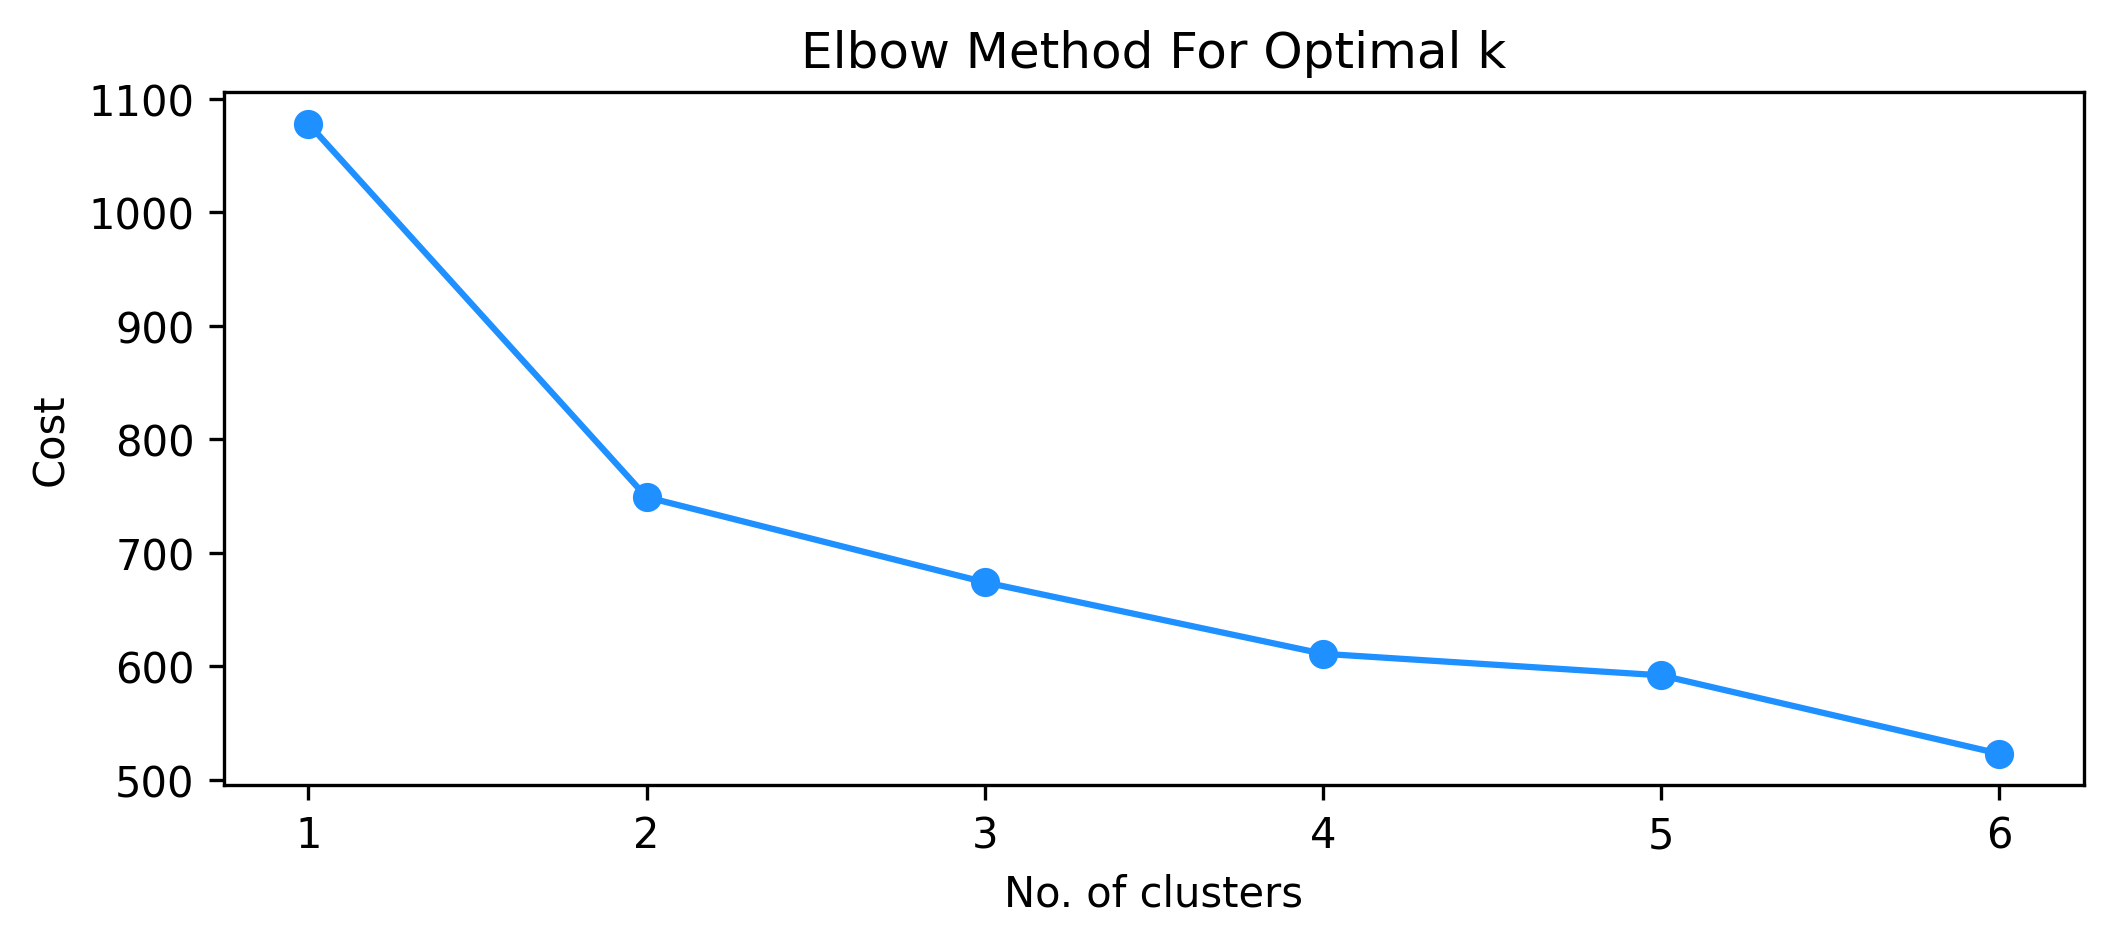

In [378]:
# Elbow curve to find optimal K
cost = []
K = range(1,7)
n_cl = []
for num_clusters in list(K):
    n_cl.append(int(num_clusters))
    kmode = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1)
    kmode.fit_predict(df_cl)
    cost.append(kmode.cost_)
plt.figure(figsize=(8,3), dpi= 300)
plt.plot(n_cl, cost, 'bo-', color = 'dodgerblue')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [379]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init='Huang', n_init=5)
clusters = kmode.fit_predict(df_cl)

In [380]:
df['Cluster'] = kmode.labels_

In [381]:
df

,age_enrollment,gender,ethnicity,vax_DTP,vax_IPV/OPV,vax_HBV,vax_Hib,vax_MPR,vax_Varicella,vax_PCV,...,duration_lack-appetite,duration_polyadenopathy,duration_skin-rash,duration_pneumonia,duration_other,median_sym_duration,infection_category,VOC,hex_vax,Cluster
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,1,2.0,1,0,0,1
1,0,1,5,1,1,1,1,0,0,0,...,0,0,0,0,0,2.0,1,0,1,0
2,0,0,3,1,1,1,1,0,0,0,...,0,0,0,0,0,4.0,1,0,1,1
3,0,0,5,1,1,1,1,0,0,1,...,0,0,0,0,0,1.0,1,0,1,2
4,0,0,5,1,1,1,1,1,1,1,...,1,0,0,0,0,1.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,18,0,5,1,1,1,1,1,0,1,...,0,0,0,0,0,0.0,0,0,1,0
577,19,0,5,1,1,1,1,1,1,1,...,0,0,0,0,3,3.0,1,0,1,2
578,19,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
579,19,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0


In [382]:
df_0 = df[df['Cluster'] == 0]
df_1 = df[df['Cluster'] == 1]
df_2 = df[df['Cluster'] == 2]

print('Number of individuals in cluster 0: ', df_0.shape[0])
print('Number of individuals in cluster 1: ', df_1.shape[0])
print('Number of individuals in cluster 2: ', df_2.shape[0])

Number of individuals in cluster 0:  378
Number of individuals in cluster 1:  90
Number of individuals in cluster 2:  113


In [383]:
binary_columns = ['Cluster']
percent_VOC_0 = df[df["VOC"] == 0][binary_columns].apply(lambda x: x.value_counts(normalize=True) * 100)
percent_VOC_1 = df[df["VOC"] == 1][binary_columns].apply(lambda x: x.value_counts(normalize=True) * 100)
percent_summary = pd.concat([percent_VOC_0, percent_VOC_1], axis=1, keys=["VOC_0", "VOC_1"])
display(percent_summary)

,VOC_0,VOC_1
,Cluster,Cluster
Cluster,,
0,69.626168,51.851852
2,19.392523,17.037037
1,10.981308,31.111111


In [ ]:
continues_cols = ["age_enrollment", "gender", 
                       'num_comorbidities', 'num_symptoms', 'median_sym_duration']

stats_CL_0 = df[df["Cluster"] == 0][continues_cols].describe()
stats_CL_1 = df[df["Cluster"] == 1][continues_cols].describe()
stats_CL_2 = df[df["Cluster"] == 2][continues_cols].describe()

stats_summary = pd.concat([stats_CL_0, stats_CL_1, stats_CL_2], axis=1, keys=["CL_0", "CL_1", "CL_2"])
display(stats_summary)

CL_0                                             \
      age_enrollment      gender num_comorbidities num_symptoms   
count     378.000000  378.000000        378.000000   378.000000   
mean        7.923280    0.542328          0.060847     1.203704   
std         4.311103    0.509389          0.239365     1.344322   
min         0.000000    0.000000          0.000000     0.000000   
25%         5.000000    0.000000          0.000000     0.000000   
50%         8.000000    1.000000          0.000000     1.000000   
75%        11.000000    1.000000          0.000000     2.000000   
max        19.000000    2.000000          1.000000     7.000000   

                                    CL_1                               \
      median_sym_duration age_enrollment     gender num_comorbidities   
count          378.000000      90.000000  90.000000         90.000000   
mean             1.263228       6.577778   0.488889          0.066667   
std              7.371095       4.716640   0.502677          0.250841   
min              0.000000       0.000000   0.000000          0.000000   
25%              0.000000       2.000000   0.000000          0.000000   
50%              0.000000       6.000000   0.000000          0.000000   
75%              0.000000      10.000000   1.000000          0.000000   
max            130.000000      17.000000   1.000000          1.000000   

                                                 CL_2              \
      num_symptoms median_sym_duration age_enrollment      gender   
count    90.000000           90.000000     113.000000  113.000000   
mean      3.411111            5.522222       7.982301    0.610619   
std       1.198261           13.297358       5.010671    0.489782   
min       2.000000            0.000000       0.000000    0.000000   
25%       3.000000            2.000000       4.000000    0.000000   
50%       3.000000            3.000000       8.000000    1.000000   
75%       4.000000            5.000000      12.000000    1.000000   
max       8.000000          126.000000      19.000000    1.000000   

                                                          
      num_comorbidities num_symptoms median_sym_duration  
count        113.000000   113.000000          113.000000  
mean           0.035398     2.265487            3.473451  
std            0.185607     1.500105            7.361168  
min            0.000000     1.000000            1.000000  
25%            0.000000     1.000000            1.000000  
50%            0.000000     2.000000            2.000000  
75%            0.000000     3.000000            3.000000  
max            1.000000     8.000000           76.000000

In [385]:
#Change labels: 0 -> 1, 1 -> 2, 2 -> 0
df['Cluster'] = df['Cluster'].replace({0: 0, 1: 2, 2: 1})

In [386]:
#Save the new dataset
df.to_csv('../data/dataset_manipulated_cl2.csv', index=False)